<a href="https://colab.research.google.com/github/mescovedo/CNN/blob/main/Cifar_10_Modelo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd /content/drive/My Drive/Colab Notebooks/Int. Comp./Exp.3

/content/drive/My Drive/Colab Notebooks/Int. Comp./Exp.3


In [ ]:
import seaborn as sn
import itertools
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from keras import backend as K
from keras.callbacks import EarlyStopping


In [ ]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [ ]:

X_train.shape

(50000, 32, 32, 3)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[4]')

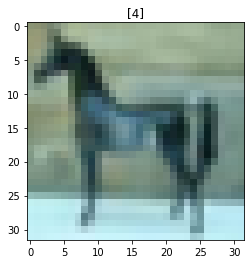

In [ ]:

plt.imshow(X_train[23000])
plt.title(Y_train[3])

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255
X_test = X_test/255

X_train.shape

(50000, 32, 32, 3)

In [ ]:
num_classes = 10

Y_train = np_utils.to_categorical(Y_train, num_classes)
Y_test = np_utils.to_categorical(Y_test, num_classes)
# X_validation = X_test[0:5000]
# Y_validation = Y_test[0:5000]
# X_test = X_test[5000:]
# Y_test = Y_test[5000:]

In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), input_shape=(32,32,3),padding='same')) 
model1.add(Activation('relu'))
model1.add(Dropout(0.2))
model1.add(Conv2D(32, (3, 3), input_shape=(32,32,3),padding='same')) 
model1.add(Activation('relu'))
model1.add(MaxPooling2D())
model1.add(Conv2D(64, (3, 3), input_shape=(32,32,3),padding='same')) 
model1.add(Activation('relu'))
model1.add(MaxPooling2D())
model1.add(Flatten())

model1.add(Dense(128))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))
model1.add(Dense(10))
model1.add(Activation('softmax'))

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [ ]:
model1.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=['accuracy'])

In [ ]:
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

model1.fit(X_train, Y_train, batch_size=50, epochs=40, validation_data=(X_test, Y_test),callbacks=[earlyStopping])

Epoch 1/40
1000/1000 [==============================] - 5s 5ms/step - loss: 1.8174 - accuracy: 0.3445 - val_loss: 1.6480 - val_accuracy: 0.4171
Epoch 2/40
1000/1000 [==============================] - 5s 5ms/step - loss: 1.5304 - accuracy: 0.4502 - val_loss: 1.4395 - val_accuracy: 0.4930
Epoch 3/40
1000/1000 [==============================] - 5s 5ms/step - loss: 1.4080 - accuracy: 0.4962 - val_loss: 1.3342 - val_accuracy: 0.5301
Epoch 4/40
1000/1000 [==============================] - 5s 5ms/step - loss: 1.3257 - accuracy: 0.5276 - val_loss: 1.2592 - val_accuracy: 0.5545
Epoch 5/40
1000/1000 [==============================] - 5s 5ms/step - loss: 1.2612 - accuracy: 0.5516 - val_loss: 1.2138 - val_accuracy: 0.5708
Epoch 6/40
1000/1000 [==============================] - 5s 5ms/step - loss: 1.2050 - accuracy: 0.5713 - val_loss: 1.1828 - val_accuracy: 0.5794
Epoch 7/40
1000/1000 [==============================] - 5s 5ms/step - loss: 1.1564 - accuracy: 0.5905 - val_loss: 1.1279 - val_accuracy:

In [ ]:
model1.evaluate(X_test, Y_test, batch_size=50)

200/200 [==============================] - 0s 2ms/step - loss: 0.9736 - accuracy: 0.7015


[0.973646879196167, 0.7014999985694885]

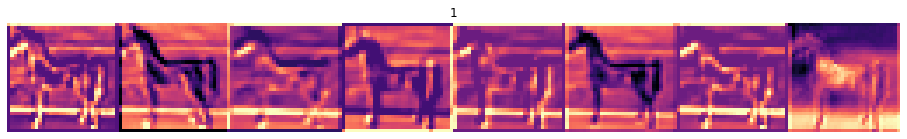

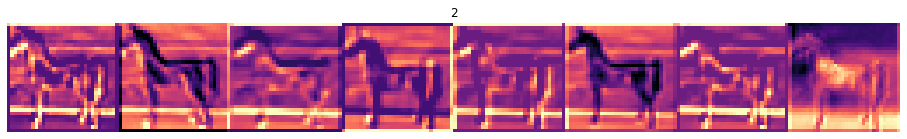

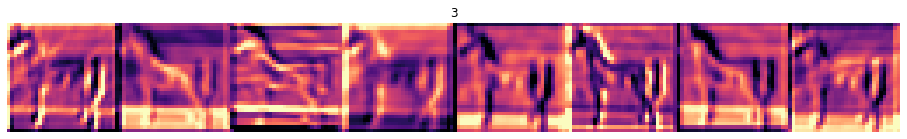

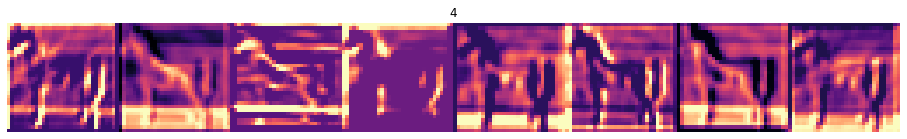

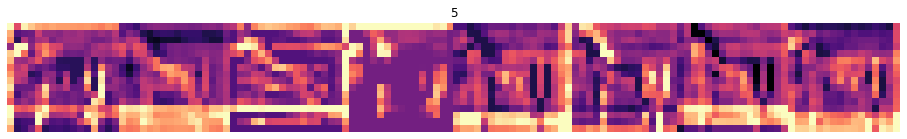

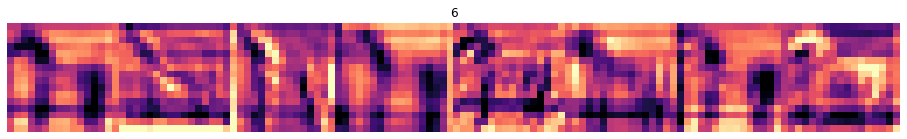

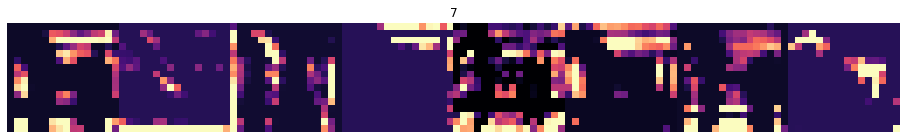

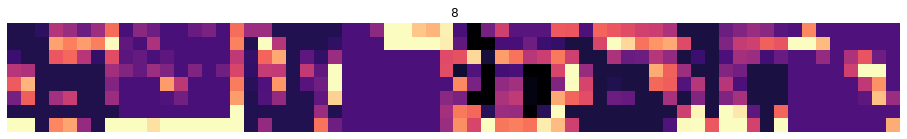

In [ ]:
layer_names = ['1','2','3','4','5','6','7','8']

layer_outputs = [layer.output for layer in model1.layers[1:]]#[layer.output for layer in model3.layers if layer.name in layer_names]
activation_model = tf.keras.models.Model(inputs=model1.input, outputs=layer_outputs)
x = X_train[23000]
x   = x.reshape((1,) + x.shape) 
intermediate_activations = activation_model.predict(x)

images_per_row = 8
max_images = 8
# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, intermediate_activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]
    n_features = min(n_features, max_images)

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 2. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.axis('off')
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='magma')
    
plt.show()

In [ ]:
y_pred = model1.predict_classes(X_test, batch_size=50,verbose=0)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(Y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(Y_test,axis=1),y_pred)
print(cm)

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[788  20  54  13  11   6  14   6  57  31]
 [ 32 821   7  11   5   4   6   2  22  90]
 [ 64   9 607  65  86  43  65  41   9  11]
 [ 27  14  90 519  52 135  88  34  18  23]
 [ 31   8 104  65 605  25  71  77  10   4]
 [ 19   3  83 205  42 538  36  56   3  15]
 [ 12   9  52  50  19  20 824   3   5   6]
 [ 31   7  39  43  36  40   8 777   4  15]
 [ 91  42  16  14   2   6   7   6 787  29]
 [ 46 113  16  17   8   8   5  10  28 749]]


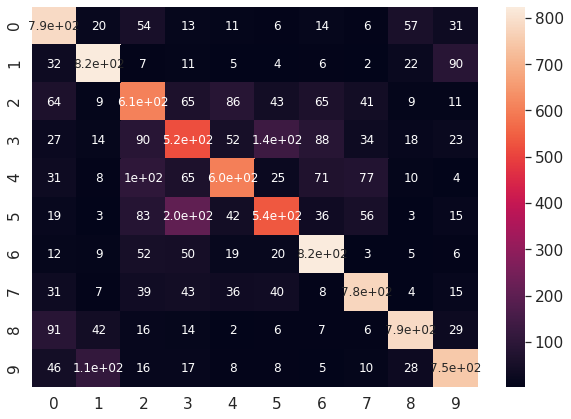

In [ ]:
df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()